In [ ]:
!pip install librosa matplotlib scikit-learn tqdm pydub tensorflow
!apt install ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 555.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
import os
from pydub import AudioSegment

source_dir = '/content/drive/MyDrive/genres'
from google.colab import drive
drive.mount('/content/drive')

import os
from pydub import AudioSegment

source_dir = '/content/drive/MyDrive/genres'

for genre in os.listdir(source_dir):
    genre_path = os.path.join(source_dir, genre)
    if os.path.isdir(genre_path):
        for filename in os.listdir(genre_path):
            if filename.endswith('.au'):
                src_path = os.path.join(genre_path, filename)
                dst_path = os.path.join(genre_path, filename.replace('.au', '.wav'))
                try:
                    audio = AudioSegment.from_file(src_path, format='au')
                    audio.export(dst_path, format='wav')
                    print(f"✅ Converted: {dst_path}")
                except Exception as e:
                    print(f"❌ Failed to convert {filename}: {e}")



Mounted at /content/drive
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00000.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00001.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00003.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00002.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00005.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00006.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00004.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00011.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00016.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00010.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00019.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00014.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00009.wav
✅ Converted: /content/drive/MyDrive/genres/reggae/reggae.00018.wav
✅ Converted: /content/drive/MyDrive/

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

DEST_DIR = '/content/dataset'
DURATION = 15
SAMPLE_RATE = 22050
AUGMENT = True

GENRES = os.listdir(source_dir)
splits = ['train', 'val', 'test']
for split in splits:
    for genre in GENRES:
        os.makedirs(os.path.join(DEST_DIR, split, genre), exist_ok=True)
def save_spectrogram(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(3, 3))
    librosa.display.specshow(S_DB, sr=sr, cmap='viridis')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def augment_audio(y, sr):
    stretch = librosa.effects.time_stretch(y, rate=0.8)
    pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
    return stretch, pitch

def process_file(wav_path, split, genre, base_name):
    y, sr = librosa.load(wav_path, sr=SAMPLE_RATE, duration=DURATION)
    save_spectrogram(y, sr, os.path.join(DEST_DIR, split, genre, f"original_{base_name}.png"))
if AUGMENT and split == 'train':
        stretch, pitch = augment_audio(y, sr)
        save_spectrogram(stretch, sr, os.path.join(DEST_DIR, split, genre, f"stretch_{base_name}.png"))
        save_spectrogram(pitch, sr, os.path.join(DEST_DIR, split, genre, f"pitch_{base_name}.png"))

for genre in GENRES:
    genre_path = os.path.join(source_dir, genre)
    files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    if not files:
        print(f"⚠ Warning: No .wav files found in {genre_path}. Skipping.")
        continue

    train_files, testval_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(testval_files, test_size=0.5, random_state=42)

    for fname in tqdm(train_files, desc=f"Train - {genre}"):
        process_file(os.path.join(genre_path, fname), 'train', genre, fname.replace('.wav', ''))

    for fname in tqdm(val_files, desc=f"Val - {genre}"):
        process_file(os.path.join(genre_path, fname), 'val', genre, fname.replace('.wav', ''))

    for fname in tqdm(test_files, desc=f"Test - {genre}"):
        process_file(os.path.join(genre_path, fname), 'test', genre, fname.replace('.wav', ''))


Test - country: 100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = len(GENRES)

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = datagen.flow_from_directory(
    os.path.join(DEST_DIR, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    os.path.join(DEST_DIR, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    os.path.join(DEST_DIR, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for correct confusion matrix
)
base_model = VGG19(include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)), weights='imagenet')

for layer in base_model.layers[:-10]:  # Freeze except last 10 layers
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg19_model.h5', monitor='val_accuracy', save_best_only=True)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

Found 700 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1307 - loss: 2.6162

22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1298 - loss: 2.6155 - val_accuracy: 0.1067 - val_loss: 2.2902
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1110 - loss: 2.4996

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1111 - loss: 2.4969 - val_accuracy: 0.2533 - val_loss: 2.2010
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1896 - loss: 2.3040

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1891 - loss: 2.3026 - val_accuracy: 0.3600 - val_loss: 2.0989
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1723 - loss: 2.2257

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1734 - loss: 2.2238 - val_accuracy: 0.4133 - val_loss: 1.9899
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2073 - loss: 2.1575 - val_accuracy: 0.3600 - val_loss: 1.9554
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2552 - loss: 2.1012 - val_accuracy: 0.4133 - val_loss: 1.8516
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2979 - loss: 1.9711

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2975 - loss: 1.9713 - val_accuracy: 0.4600 - val_loss: 1.7734
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2871 - loss: 1.9613

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2882 - loss: 1.9594 - val_accuracy: 0.4733 - val_loss: 1.7287
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2967 - loss: 1.8673

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2968 - loss: 1.8684 - val_accuracy: 0.4800 - val_loss: 1.6981
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3545 - loss: 1.8222

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3540 - loss: 1.8234 - val_accuracy: 0.5467 - val_loss: 1.6152
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3447 - loss: 1.8498 - val_accuracy: 0.5400 - val_loss: 1.5337
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4016 - loss: 1.6909

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4010 - loss: 1.6925 - val_accuracy: 0.5733 - val_loss: 1.5017
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3991 - loss: 1.7186

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3992 - loss: 1.7180 - val_accuracy: 0.6133 - val_loss: 1.3452
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4028 - loss: 1.6656 - val_accuracy: 0.6067 - val_loss: 1.2989
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4463 - loss: 1.5808

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4464 - loss: 1.5807 - val_accuracy: 0.6400 - val_loss: 1.2702
Epoch 16/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4579 - loss: 1.5506 - val_accuracy: 0.6133 - val_loss: 1.2503
Epoch 17/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4900 - loss: 1.5076 - val_accuracy: 0.6267 - val_loss: 1.1819
Epoch 18/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4672 - loss: 1.5584 - val_accuracy: 0.6333 - val_loss: 1.1436
Epoch 19/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5411 - loss: 1.3762

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5408 - loss: 1.3765 - val_accuracy: 0.6733 - val_loss: 1.0653
Epoch 20/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5022 - loss: 1.3975

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5026 - loss: 1.3982 - val_accuracy: 0.7267 - val_loss: 1.0550
Epoch 21/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5232 - loss: 1.3947 - val_accuracy: 0.6800 - val_loss: 1.0305
Epoch 22/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5376 - loss: 1.4296 - val_accuracy: 0.7067 - val_loss: 1.0053
Epoch 23/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5839 - loss: 1.2442 - val_accuracy: 0.7267 - val_loss: 0.9736
Epoch 24/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5715 - loss: 1.2892 - val_accuracy: 0.7133 - val_loss: 0.9660
Epoch 25/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5736 - loss: 1.2667 - val_accuracy: 0.6867 - val_loss: 1.0033
Epoch 26/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5899 - loss: 1.3067 - val_accuracy: 0.6867 - val_loss: 0.9498
Epoch 27/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6198 - loss: 1.1433 - val_accuracy: 0.7133 - val_loss: 0.9

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5737 - loss: 1.2463 - val_accuracy: 0.7467 - val_loss: 0.9219
Epoch 30/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5981 - loss: 1.1474 - val_accuracy: 0.7067 - val_loss: 0.9127
Epoch 31/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5980 - loss: 1.1709 - val_accuracy: 0.7467 - val_loss: 0.9667
Epoch 32/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6273 - loss: 1.0712 - val_accuracy: 0.7267 - val_loss: 0.9004
Epoch 33/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6492 - loss: 1.0882 - val_accuracy: 0.7400 - val_loss: 0.8206
Epoch 34/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6649 - loss: 1.0312 - val_accuracy: 0.7133 - val_loss: 0.8382
Epoch 35/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6435 - loss: 1.0230 - val_accuracy: 0.7133 - val_loss: 0.9782
Epoch 36/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6624 - loss: 1.0508 - val_accuracy: 0.6933 - val_loss: 0.8

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6288 - loss: 1.1111 - val_accuracy: 0.7600 - val_loss: 0.8039
Epoch 40/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6988 - loss: 0.9618 - val_accuracy: 0.7400 - val_loss: 0.7956
Epoch 41/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6406 - loss: 1.0412

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6406 - loss: 1.0400 - val_accuracy: 0.7867 - val_loss: 0.8293
Epoch 42/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6548 - loss: 0.9927 - val_accuracy: 0.7667 - val_loss: 0.9078
Epoch 43/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6410 - loss: 1.0605 - val_accuracy: 0.7467 - val_loss: 0.8206
Epoch 44/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7053 - loss: 0.9012 - val_accuracy: 0.7400 - val_loss: 0.7627
Epoch 45/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6903 - loss: 0.8586 - val_accuracy: 0.7533 - val_loss: 0.7757
Epoch 46/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6633 - loss: 0.9342 - val_accuracy: 0.7467 - val_loss: 0.7742
Epoch 47/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7359 - loss: 0.8214 - val_accuracy: 0.7333 - val_loss: 0.8381
Epoch 48/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6986 - loss: 0.9063 - val_accuracy: 0.7667 - val_loss: 0.7

22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6837 - loss: 0.9153 - val_accuracy: 0.8000 - val_loss: 0.7554
Epoch 50/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7039 - loss: 0.8247 - val_accuracy: 0.8000 - val_loss: 0.7709


In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"\n✅ Final Test Accuracy: {acc * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.7063 - loss: 0.8403

✅ Final Test Accuracy: 68.67%


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 649ms/step


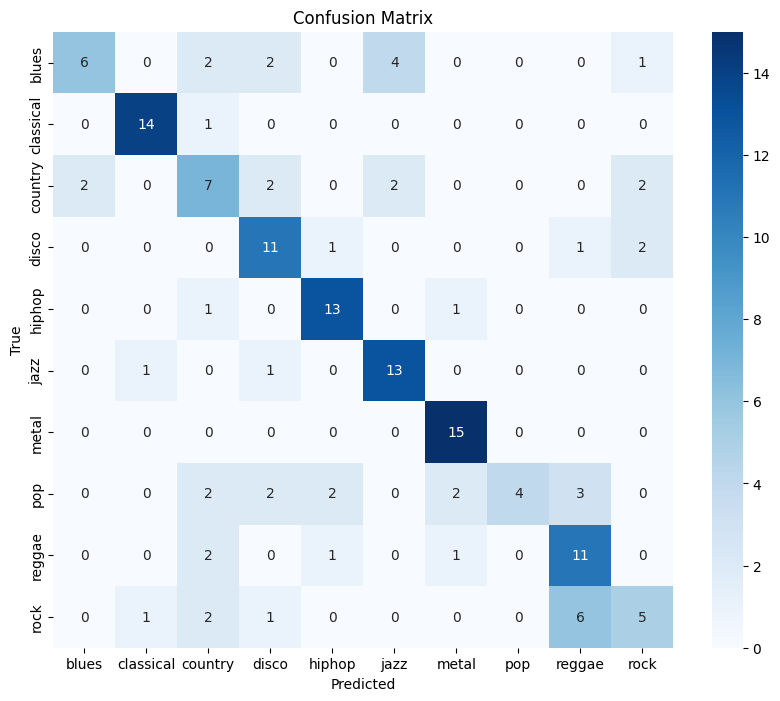

Classification Report:
               precision    recall  f1-score   support

       blues       0.75      0.40      0.52        15
   classical       0.88      0.93      0.90        15
     country       0.41      0.47      0.44        15
       disco       0.58      0.73      0.65        15
      hiphop       0.76      0.87      0.81        15
        jazz       0.68      0.87      0.76        15
       metal       0.79      1.00      0.88        15
         pop       1.00      0.27      0.42        15
      reggae       0.52      0.73      0.61        15
        rock       0.50      0.33      0.40        15

    accuracy                           0.66       150
   macro avg       0.69      0.66      0.64       150
weighted avg       0.69      0.66      0.64       150



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)